#### Importing the Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import csv
import tkinter as tk
from tkinter import filedialog

root = tk.Tk()
root.withdraw()

''

#### Defining some useful functions

In [2]:
def get_data_from_csv(filepath):#gets capacitance and frequency data from the csv file
    
    csv_fixer(filepath)
    
    new_file_name = filepath.with_name(filepath.stem+"_fixed.csv")
    
    file = pd.read_csv(new_file_name,index_col = 0,header = 2,sep = '\t')
        
    Cap_list = []#list of capacitance data for each loop
    Freq_list = []#list of frequency data for each loop
        
    Sweep = file["Result Number"]
    Cap = file["Impedance Imaginary (Ohms)"]#for some reason all collumns are shifted by one
    Freq = file["Time"]                 #so pandas places the capacitance data on the "Impedance Imaginary (Ohms)" collumn
                                            #and the frequency data on the "Time" collumn
    
    number_of_sweeps = int(Sweep[len(Sweep)-1])
    
    for l in range(number_of_sweeps):
        Cap_list.append(Cap[Sweep == l+1])
        Freq_list.append(Freq[Sweep == l+1])
            
    return Cap_list,Freq_list,number_of_sweeps

def csv_fixer(filepath,skip_lines=3):#shapes the data from SMART's output into something that can be read using pandas
                            #i.e. changes the decimal marker from "," to "." and separates the names of collumns using tab (\t)
                            #then saves it in a file called "(file_name)_fixed.csv"
    
    text = []
    
    with open(filepath) as fp:# reads the input file and copies it to the 'text' variable
        
        for counter in range(skip_lines):#these first few lines are only to ensure the file outputted is the same 
            line = fp.readline()  #as the original with the exception of our few wanted changes, 
            text.append(line)       #even though these few lines are useless and will be ignored later.
            counter += 1
   

        line = fp.readline() #changes the collumn name separators
        text.append(line.replace(',','\t'))
        
        line = fp.readline()
        
        while line:
            
            text.append(line.replace(',','.'))#replaces the decimal marker
            
            line = fp.readline()

            
    new_file_name = filepath.with_name(filepath.stem+"_fixed.csv")
    
    
    with open(new_file_name,'w') as f:#creates the new 'fixed' file
    
        for phrase in text:
            f.write(phrase)
    

#### ANY FIGURES GENERATED FROM THIS SCRIPT ARE SAVED ON A FOLDER CALLED "Monograph_Script_Images" ####
#### CREATED ON THE SAME FOLDER WHERE THIS NOTEBOOK IS RUNNING IN. ####

In [3]:
#if all files are on the same folder you can just keep number_of_files as 0 and use multi-selection on the pop up window
#if not you have to manually set how many files you are going to open

number_of_files = 6
meio = "ar"

figure_name = "IDEs sem filme no ar".replace(" ","_")
img_size = 150 #changes the "dpi" option on the plot, i put it here so its more organized 

#### THIS IS WHERE YOU CHANGE THE LABELS

In [4]:
def condition_labelling(sweep=0,file_number=0):# sets the label of a curve according to the sweep number and the file number
                                        #returns a string and should be edited when needed.  
    
    sweep += 1 #accounts for sweep starting at 0 and going to total_number_of_sweeps - 1 and same for file_number
    file_number += 1
    
    return "IDE"+str(file_number)

#### THIS SETS CONDITIONS TO EXCLUDE SPECIFIC SWEEPS FROM SPECIFIC FILES 

In [5]:
def condition_exclusion(sweep=0,file_number=0):#sets a condition to not show specific curves when plotting them,
                                            #you may choose to block certain sweeps from a file or even all curves from a file
                                        #this function returns either True or False (1 or 0) and should be edited when needed.
    
    sweep += 1 #accounts for sweep starting at 0 and going to total_number_of_sweeps - 1 and same for file_number
    file_number += 1
    
    return True

#### THEIS BLOCK HANDLES THE FILE ACQUISITION AND FIGURE SAVING SETTINGS ####

In [6]:
data_files = []

if(number_of_files != 0):
    
    for i in range(number_of_files):#opens the files and gets their addresses
        data_files.append(Path(filedialog.askopenfilename()))
        
else:
    
    data_files_pre = list(filedialog.askopenfilenames())

    for x in data_files_pre:
        data_files.append(Path(x))

    number_of_files = len(data_files)
    
default_folder = "Monograph_Script_Images" 

if(not os.path.exists(default_folder)):
    os.makedirs(default_folder)

    
save_folder = Path(os.getcwd()+"/"+default_folder)

##### EVERY VARIABLE AND CONDITION SHOULD BE SET BEFORE THIS LINE !!! ####
##### AFTER THIS LINE YOU SHOULD ONLY CHANGE PLOT SETTINGS SUCH AS X AND Y SCALES AND LIMITS ####

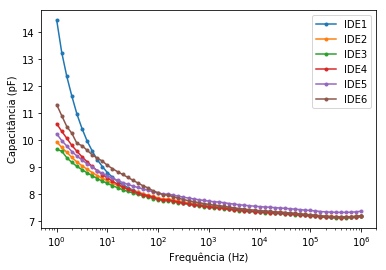

In [8]:
for file_number in range(number_of_files):

    file = data_files[file_number]#this file_number can be used to name the electrodes later, so if in each file 
                                #you have a different electrode just use this "file_number" variable to set the label properly
        
    Capacitance, Frequency, number_of_sweeps = get_data_from_csv(file)
    
    
    if(meio == "ar"):

        for sweep in range(number_of_sweeps):
            if(condition_exclusion(sweep,file_number)):
                plt.plot(
                        Frequency[sweep],
                         (10**12)*Capacitance[sweep],
                         "-o",
                         markersize = 3
                         ,label = condition_labelling(sweep,file_number)
                        )
                
                plt.xlabel("Frequência (Hz)")
                plt.ylabel("Capacitância (pF)")
                plt.legend(loc = "upper right")
                #plt.xlim([1,10**3])
                #plt.xlim([10**3,10**6])
                #plt.ylim([7,8.5])
                #plt.yscale("log")
                plt.xscale("log")
                plt.savefig(save_folder/(figure_name+".png"),dpi=img_size)
                
    elif(meio == "agua"):
        
        for sweep in range(number_of_sweeps):
            if(condition_exclusion(sweep,file_number)):
                plt.plot(
                        Frequency[sweep],
                         Capacitance[sweep],
                         "-o",
                         markersize = 3,
                         label = condition_labelling(sweep,file_number)
                        )
                
                plt.xlabel("Frequência (Hz)")
                plt.ylabel("Capacitância (F)")
                plt.legend(loc = "upper right")
                #plt.xlim([1,10**3])
                #plt.xlim([10**3,10**6])
                #plt.ylim([7,8.5])
                plt.yscale("log")
                plt.xscale("log")
                plt.savefig(save_folder/(figure_name+".png"),dpi=img_size)
        